<DIV ALIGN=CENTER>

# Decision Trees
## Professor Robert J. Brunner
  
</DIV>  
-----
-----

## Introduction

In this IPython Notebook, we explore how to effectively use the
k-nearest neighbor algorithm for both classification. First, we repeat
the k-nn analysis done in the Introduction to Machine Learning Notebook
from Week 1, which first introduced k-nn. Also, explore how changes in
the default parameters might affect the performance of this algorithm.

First, we will setup this Notebook, and then introduce the Iris data,
before making classifications for this data by using the scikit learn's
[Nearest Neighbors][nnsk] algorithm.

# Could show a tree

-----

[nnsk]: http://scikit-learn.org/stable/modules/neighbors.html

In [2]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


-----

## Iris Data

We will use the standard Iris classification data set to explore how to
use these basic classification algorithms, starting in this Notebooks
with k-nearest neighbors, or knn. The four primary dimensions of the
data include Sepal Length, Sepal Width, Petal Length, and Petal Width,
which can be seen from the following Iris picture (or type _virginica_).

![Iris picture from Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg)

The data set consists of 150 total measurements of three different types
of Iris flowers, equally divided between three classes: Iris Setosa,
Iris versicolor, and Iris virginica. Before proceeding, we can examine
the Pandas DataFrame that contains these data.

-----

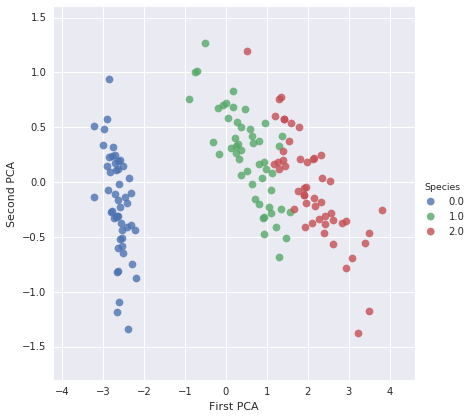

In [3]:
# We import helper code for getting and plotting the Iris data
from helper_code import iris as hi

# Now we grab the raw data, and also create a sampled grid of data.

# This code restricts the features to the top two PCA components
# This simplifies the viewing of the predited labels.

data = hi.get_data()
mdata = hi.get_mdata(data)

# Get features (x) and labels (y)
x = data[:, 0:2]
y = data[:, 2]

# Show the data
cols = ['PCA1', 'PCA2', 'Species']

# We make a plot of the features.
hi.scplot_data('PCA1', 'PCA2', pd.DataFrame(data, columns = cols), 'Species',
               'First PCA', 'Second PCA', (-4.2, 4.6), (-1.8, 1.6), 6)

-----

## [Decision Trees][dt]

The third algorithm we will explore is the Decision Tree. A decision
tree simply asks a set of questions of the data, and based on the
answers determines the final classification. The tree is constructed by
recursively splitting a data set into new groupings based on a
statistical measure of the data along each different dimension (popular
measures include the Gini coefficient or the entropy). A basic decision
tree for the titanic survivor data set is demonstrated in the following
figure from Wikipedia (note that _sibsp_ counts the number of spouses or
siblings aboard).

![DT IMage from Wikipedia][dti]

The terminal nodes in the tree are known as leaf nodes, and the provide
the final predictions. In the simplest form, the leaf node simply
provides the final answer, as shown above the leaf nodes provide the
probability of survival.

We can use a decision tree classifier by using scikit-learn to once
again create a model, fit the model to the training data, and
subsequently applying the model to the test data to make predictions. We
compare the prediction accuracy in the resulting confusion matrix.

-----

[dt]: https://en.wikipedia.org/wiki/Decision_tree_learning
[dti]: https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png

DT prediction accuracy =  92.1%


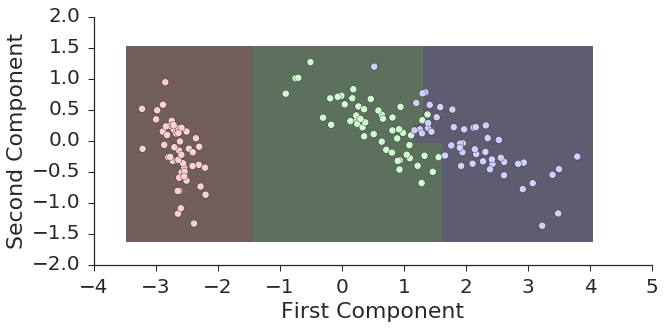

In [5]:
import sklearn.cross_validation as cv
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

# Next lets try Decision Trees
from sklearn import tree

# First we construct our Classification Model
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train)

z = dtc.predict(mdata)

hi.splot_data(data, mdata, z, 'First Component', 'Second Component', 50)

print("DT prediction accuracy = {0:5.1f}%".format(100.0 * dtc.score(x_test, y_test)))

In [6]:
from sklearn.metrics import classification_report

y_pred = dtc.predict(x_test)
print(classification_report(y_test, y_pred, \
                            target_names = ['Setosa', 'Versicolor', 'Virginica']))

             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        17
 Versicolor       0.86      0.92      0.89        13
  Virginica       0.86      0.75      0.80         8

avg / total       0.92      0.92      0.92        38



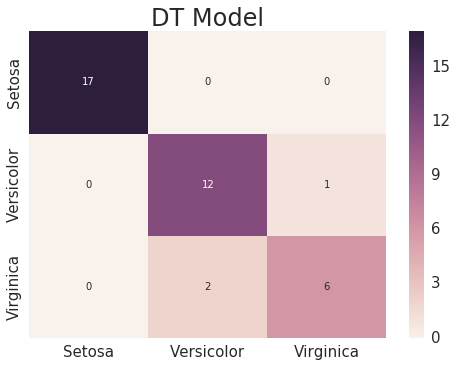

In [7]:
from helper_code import mlplots as mlp

mlp.confusion(y_test, y_pred, ['Setosa', 'Versicolor', 'Virginica'], 3, 'DT Model')

-----

## Student Activity

In the preceding cells, we used a simple k-nearest neighbor model to
predict classifications for the Iris Data. Now that you have run the
Notebook once, go back and make the following changes to see how the
results change.

1. Change the cross-validation split size, for example change from a
75%:25% to a 50%:50%?
2. Change the number of neighbors to 1, 5, and 10.
3. Change other default parameters, for example `radius` or `algorithm`
and explore how the accuracy changes.

What can you learn from the two-dimensional figure?

-----

## Handwritten Digits

Now we switch to a second type of data and explore k-NN
classification applied to handwritten digits. First we will load the
data and review some of the sample. After which, we will apply a Nearest
Neighbor classification to these data and explore the resulting
predictions.

-----

Total number of samples = 1797


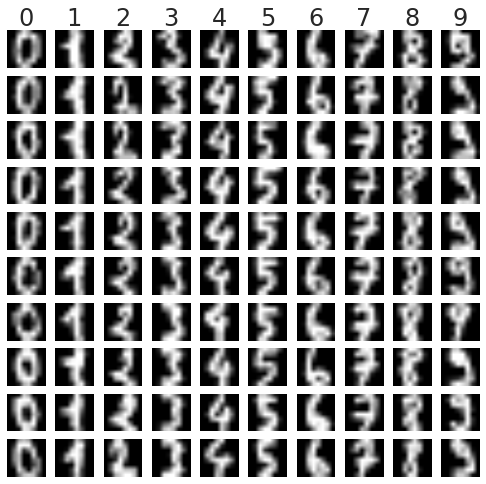

In [8]:
from helper_code import digits as hd

x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

-----

### Classification of image data

Now that these data are loaded, we can apply a k-NN classifier to this
problem. Below we employ a simple Nearest Neighbor  (with the default
number of neighbors, = 5), and show the classification score, the
classification report, and the confusion matrix.

----- 

In [9]:
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train)

print('Prediction Accuracy = {0:3.1f}%'.format(100*dtc.score(x_test, y_test)))

Prediction Accuracy = 85.1%


In [10]:
y_pred = dtc.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.92      0.95        49
          1       0.85      0.85      0.85        34
          2       0.89      0.74      0.80        53
          3       0.83      0.85      0.84        41
          4       0.81      0.73      0.77        41
          5       0.87      0.94      0.90        48
          6       0.88      0.98      0.92        44
          7       0.83      0.85      0.84        46
          8       0.79      0.79      0.79        47
          9       0.79      0.87      0.83        47

avg / total       0.85      0.85      0.85       450



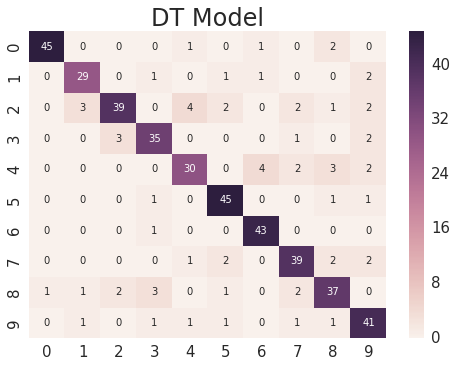

In [11]:
nms = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


mlp.confusion(y_test, y_pred, nms, 10, 'DT Model')

-----

### Model Evaluation

The k-NN model performed in a reasonable manner, but what about
on completely blind data. We can test the model by _making_ new data.
Below we use methods in the helper code to make _fake_ data, in this
case images of **one** and **seven**. We display the _fake_ images, and
then the results of our model classifying these new data.

-----

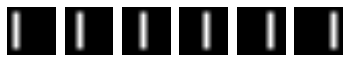

In [12]:
# Test on our sevens

ones = hd.make_ones()

hd.plot_numbers(ones)

In [13]:
# You can change the values to make other numbers.

ones[0].reshape(8,8)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [14]:
print('Actual : Predicted')

for one in ones:
    print('  1    :     {0}'.format(dtc.predict(one.ravel())[0])) 

Actual : Predicted
  1    :     4
  1    :     4
  1    :     4
  1    :     1
  1    :     4
  1    :     4


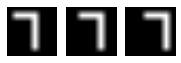

In [15]:
# Now test on our sevens

sevens = hd.make_sevens()
hd.plot_numbers(sevens)

In [16]:
print('Actual : Predicted')
for seven in sevens:
    print('  7    :     {0}'.format(dtc.predict(seven.ravel())[0])) 

Actual : Predicted
  7    :     1
  7    :     4
  7    :     4


-----

## Student Activity

In the preceding cells, we used a simple k-NN model to predict
classifications for the digit data. Now that you have run the Notebook,
go back and make the following changes to see how the results change.

1. Change the cross-validation split size, for example change from a
75%:25% to a 50%:50%?

2. Change the default parameters in the k-NN algorithm, like the number
of neighbors. Read the code documentation to learn about the default
parameters.

Finally can you explain (feel free to use the class forums) why the
model performed in the  manner it did for the _fake_ digits?

-----